# Differentation

### Symbolic Differentation

In [1]:
import sympy as sy

In [2]:
x = sy.symbols('x')

In [3]:
sy.diff(x**3 + x, x) # differentiate the function respect to x

3*x**2 + 1

Problem 1: Derivate $f(x) = (\sin{(x)} + 1)^{\sin({\cos{(x)}})} $ respect to x.

In [4]:
x = sy.symbols('x')

In [5]:
f_diff = sy.diff((sy.sin(x) + 1)**(sy.sin(sy.cos(x))), x)

In [6]:
import numpy

In [7]:
intval = numpy.linspace(-numpy.pi, numpy.pi, 1000)

In [8]:
f_d = sy.lambdify(x, f_diff, "numpy") #defining a function that gives back the values for each element in the interval

In [9]:
from matplotlib import pyplot as plt

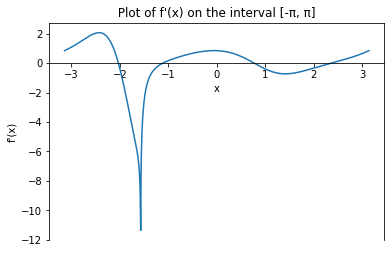

In [10]:
fig, ax = plt.subplots()

ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.plot(intval, f_d(intval))
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.title(" Plot of f'(x) on the interval [-π, π] ")

plt.show()

### Differentation Software (Autograd)

In [11]:
from autograd import numpy as anp

In [12]:
from autograd import grad

In [13]:
g = lambda x: anp.exp(anp.sin(anp.cos(x)))

In [14]:
dg = grad(g)

In [15]:
dg(1.0)

-1.2069777039799139

In [16]:
from autograd import elementwise_grad

In [17]:
pts = anp.array([1.0, 2.0, 3.0], dtype = anp.float)

In [18]:
dg = elementwise_grad(g)

In [19]:
dg(pts)

array([-1.2069777 , -0.55514144, -0.03356146])

In [20]:
from sympy import factorial

In [21]:
def taylor_exp(x, tol=.0001):
    """ 
    Compute the Taylor series of e^x with terms greater than tol. 
    """
    result, i, term = 0, 0, x
    while anp.abs(term) > tol:
        term = x**i / int(factorial(i))
        result, i = result + term, i + 1
    return result

In [22]:
d_exp = grad(taylor_exp) #differentiating this series!

In [23]:
print(d_exp(2.0, .1), d_exp(2.0, .00001))

7.266666666666667 7.389046015712682


**Chebysev Polynomials** -> $T_0(x) = 1, T_1(x) = x, T_n(x) = 2 n T_{n-1}(x) - T_{n-2}(x) $

In [24]:
def chebysev_pol(x, n):
    
    import autograd.numpy as anp
  
    i = 1
    T = anp.zeros_like(x)

    while n >= i:

        T_2, T_1 = anp.repeat(1, len(x)), anp.array(x)
        T = anp.subtract(anp.multiply(2, anp.multiply(i, T_1)), T_2)
        T_2, T_1, i = T_1, T, i + 1

    return T

In [25]:
chebysev_pol(anp.array([1, 2, 3]), 10)

array([19, 39, 59])

In [26]:
x = anp.linspace(-1, 1, 1000)

In [27]:
chebysev_pol(x, 1.)

array([-3.00000000e+00, -2.99599600e+00, -2.99199199e+00, -2.98798799e+00,
       -2.98398398e+00, -2.97997998e+00, -2.97597598e+00, -2.97197197e+00,
       -2.96796797e+00, -2.96396396e+00, -2.95995996e+00, -2.95595596e+00,
       -2.95195195e+00, -2.94794795e+00, -2.94394394e+00, -2.93993994e+00,
       -2.93593594e+00, -2.93193193e+00, -2.92792793e+00, -2.92392392e+00,
       -2.91991992e+00, -2.91591592e+00, -2.91191191e+00, -2.90790791e+00,
       -2.90390390e+00, -2.89989990e+00, -2.89589590e+00, -2.89189189e+00,
       -2.88788789e+00, -2.88388388e+00, -2.87987988e+00, -2.87587588e+00,
       -2.87187187e+00, -2.86786787e+00, -2.86386386e+00, -2.85985986e+00,
       -2.85585586e+00, -2.85185185e+00, -2.84784785e+00, -2.84384384e+00,
       -2.83983984e+00, -2.83583584e+00, -2.83183183e+00, -2.82782783e+00,
       -2.82382382e+00, -2.81981982e+00, -2.81581582e+00, -2.81181181e+00,
       -2.80780781e+00, -2.80380380e+00, -2.79979980e+00, -2.79579580e+00,
       -2.79179179e+00, -

### More Autograd

In [28]:
f = lambda x, y: 3*x*y + 2*y - x

In [29]:
dfdx = grad(f, argnum = 0)

In [30]:
dfdx(5., 1.)

2.0

In [31]:
dfdy = grad(f, argnum = 1)

In [32]:
dfdy(5., 1.)

17.0

In [33]:
grad_f = grad(f, argnum = [0, 1])

In [34]:
anp.array(grad_f(5., 1.))

array([ 2., 17.])

In [35]:
from autograd import jacobian

In [36]:
f = lambda x: anp.array([x[0]**2, x[0]+x[1]])

In [37]:
f_jac = jacobian(f)

In [38]:
f_jac(anp.array([1., 1.]))

array([[2., 0.],
       [1., 1.]])